Before you turn in the homework, make sure everything runs as expected. To do so, select **Kernel**$\rightarrow$**Restart & Run All** in the toolbar above.  Remember to submit both on **DataHub** and **Gradescope**.

Please fill in your name and include a list of your collaborators below.

# Project 2: NYC Taxi Rides
# Part 3: NYC Accidents Data

In the real world, data isn't always nicely bundled in one file; data can be sourced from many places with many formats. Now we will use NYC accident data to try to improve our set of features.

In this part of the project, you'll do some EDA over the combined data set. We'll do a lot of the coding work for you, but there will be a few coding subtasks for you to complete on your own, as well as many results to interpret.

### Note
If your kernel dies unexpectedly, make sure you have shutdown all other notebooks. Each notebook uses valuable memory which we will need for this part of the project.

# Imports

Let us start by loading the Python libraries and custom tools we will use in this part.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from pathlib import Path

sns.set(style="whitegrid", palette="muted")

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

%matplotlib inline

## Downloading the Data

We will use the `fetch_and_cache` utility to download the dataset.

In [30]:
# Download and cache urls and get the file objects.
from utils import fetch_and_cache
data_url = 'https://github.com/DS-100/fa18/raw/gh-pages/assets/datasets/collisions.zip'
file_name = 'collisions.zip'
dest_path = fetch_and_cache(data_url=data_url, file=file_name)

print(f'Located at {dest_path}')

Using version already downloaded: Wed Nov 28 03:12:02 2018
MD5 hash of file: a445b925d24f319cb60bd3ace6e4172b
Located at data/collisions.zip


We will store the taxi data locally before loading it.

In [31]:
collisions_zip = zipfile.ZipFile(dest_path, 'r')

#Extract zip files 
collisions_dir = Path('data/collisions')
collisions_zip.extractall(collisions_dir)

## Loading and Formatting Data 

The following code loads the collisions data into a Pandas DataFrame.

In [32]:
# Run this cell to load the collisions data. 
skiprows = None
collisions = pd.read_csv(collisions_dir/'collisions_2016.csv', index_col='UNIQUE KEY', 
                         parse_dates={'DATETIME':["DATE","TIME"]}, skiprows=skiprows)
collisions['TIME'] = pd.to_datetime(collisions['DATETIME']).dt.hour
collisions['DATE'] = pd.to_datetime(collisions['DATETIME']).dt.date
collisions = collisions.dropna(subset=['LATITUDE', 'LONGITUDE'])
collisions = collisions[collisions['LATITUDE'] <= 40.85]
collisions = collisions[collisions['LATITUDE'] >= 40.63]
collisions = collisions[collisions['LONGITUDE'] <= -73.65]
collisions = collisions[collisions['LONGITUDE'] >= -74.03]
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116691 entries, 3589202 to 3363795
Data columns (total 30 columns):
DATETIME                         116691 non-null datetime64[ns]
Unnamed: 0                       116691 non-null int64
BOROUGH                          100532 non-null object
ZIP CODE                         100513 non-null float64
LATITUDE                         116691 non-null float64
LONGITUDE                        116691 non-null float64
LOCATION                         116691 non-null object
ON STREET NAME                   95914 non-null object
CROSS STREET NAME                95757 non-null object
OFF STREET NAME                  61545 non-null object
NUMBER OF PERSONS INJURED        116691 non-null int64
NUMBER OF PERSONS KILLED         116691 non-null int64
NUMBER OF PEDESTRIANS INJURED    116691 non-null int64
NUMBER OF PEDESTRIANS KILLED     116691 non-null int64
NUMBER OF CYCLIST INJURED        116691 non-null int64
NUMBER OF CYCLIST KILLED         116691 

## 1: EDA of Accidents

Let's start by plotting the latitude and longitude where accidents occur. This may give us some insight on taxi ride durations. We sample N times (given) from the collisions dataset and create a 2D KDE plot of the longitude and latitude. We make sure to set the x and y limits according to the boundaries of New York, given below.

Here is a [map of Manhattan](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488) for your convenience.

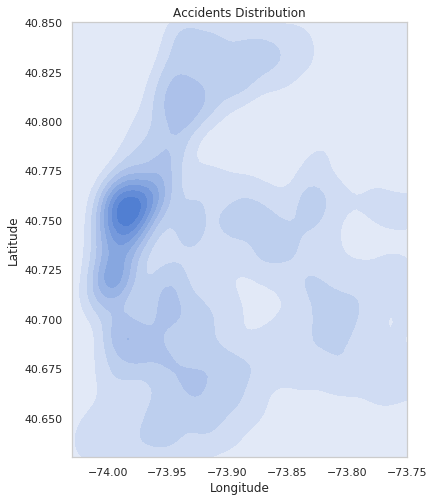

In [33]:
# Plot lat/lon of accidents, will take a few seconds
N = 20000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

sample = collisions.sample(N)
plt.figure(figsize=(6,8))
sns.kdeplot(sample["LONGITUDE"], sample["LATITUDE"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Distribution")
plt.show();

### Question 1a
What can you say about the location density of NYC collisions based on the plot above?

**Hint: Here is a [page](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488) that may be useful, and [another page](https://www.6sqft.com/what-nycs-population-looks-like-day-vs-night/) that may be useful.**

In [34]:
q1a_answer = r"""

Based on the 2D KDE plotted above, we are able to infer the location density of NYC collisions. 
The x-axis represents the longitude and the y-axis represents the latitude. 
We can see that there is more density (the darker region of the plot) around latitude 40.713 to 40.775
and between longitude -74.00 and -73.95. Due to this being the darker region, and thus the more density, 
we can conclude that these are the locations where there is a higher density of NYC collisions. And the inner
darkest region, the area with the most density, is where there is a higher density of NYC collision. That is
approximately latitude 40.760 and longitude -73.80. 

"""

#raise NotImplementedError()

print(q1a_answer)



Based on the 2D KDE plotted above, we are able to infer the location density of NYC collisions. 
The x-axis represents the longitude and the y-axis represents the latitude. 
We can see that there is more density (the darker region of the plot) around latitude 40.713 to 40.775
and between longitude -74.00 and -73.95. Due to this being the darker region, and thus the more density, 
we can conclude that these are the locations where there is a higher density of NYC collisions. And the inner
darkest region, the area with the most density, is where there is a higher density of NYC collision. That is
approximately latitude 40.760 and longitude -73.80. 




We see that an entry in accidents contains information on number of people injured/killed. Instead of using each of these columns separately, let's combine them into one column called `'SEVERITY'`. Let's also make columns `FATALITY` and `INJURY`, each aggregating the fatalities and injuries respectively.

In [35]:
collisions['SEVERITY'] = collisions.filter(regex=r'NUMBER OF *').sum(axis=1)
collisions['FATALITY'] = collisions.filter(regex=r'KILLED').sum(axis=1)
collisions['INJURY'] = collisions.filter(regex=r'INJURED').sum(axis=1)

Now let's group by time and compare two aggregations: count vs mean. Below we plot the number of collisions and the mean severity of collisions by the hour, i.e. the `TIME` column. We visualize them side by side and set the start of our day to be 6 a.m.

Let's also take a look at the mean number of casualties per hour and the mean number of injuries per hour, plotted below.

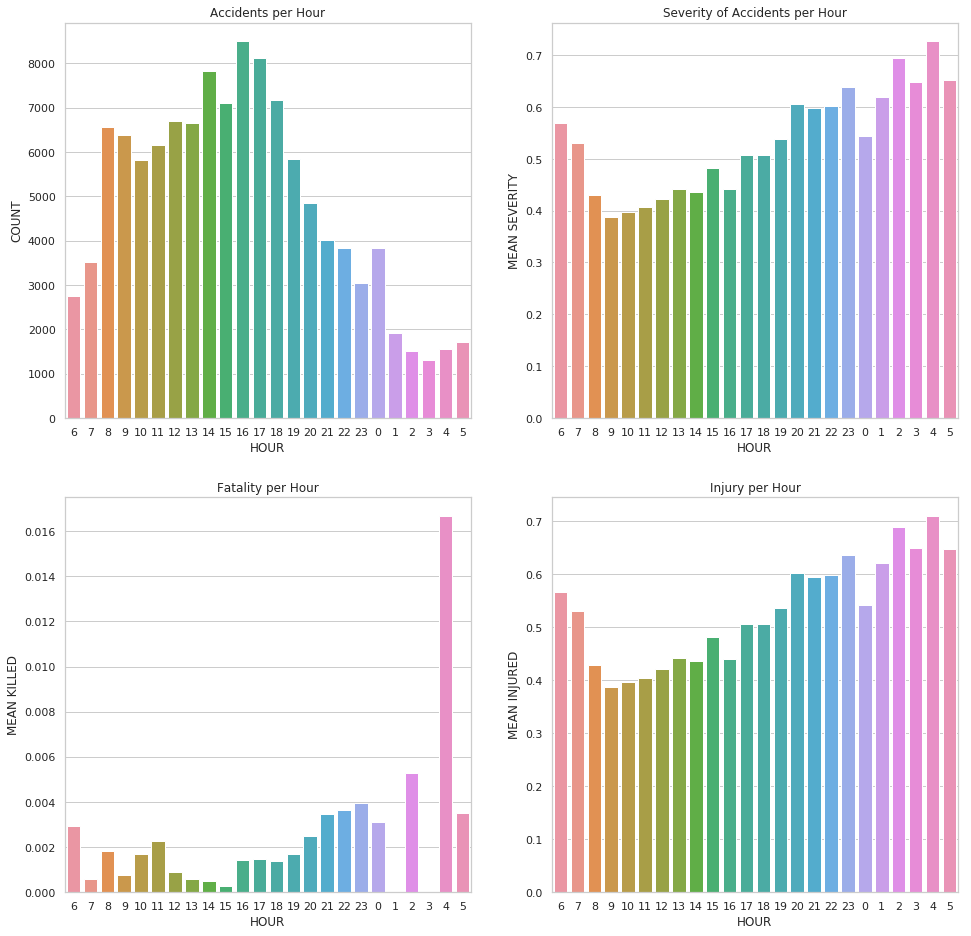

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))
order = np.roll(np.arange(24), -6)
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

collisions_count = collisions.groupby('TIME').count()
collisions_count = collisions_count.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_count, order=order, ax=ax1)
ax1.set_title("Accidents per Hour")
ax1.set_xlabel("HOUR")
ax1.set_ylabel('COUNT')


collisions_mean = collisions.groupby('TIME').mean()
collisions_mean = collisions_mean.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_mean, order=order, ax=ax2)
ax2.set_title("Severity of Accidents per Hour")
ax2.set_xlabel("HOUR")
ax2.set_ylabel('MEAN SEVERITY')

fatality_count = collisions.groupby('TIME').mean()
fatality_count = fatality_count.reset_index()
sns.barplot(x='TIME', y='FATALITY', data=fatality_count, order=order, ax=ax3)
ax3.set_title("Fatality per Hour")
ax3.set_xlabel("HOUR")
ax3.set_ylabel('MEAN KILLED')

injury_count = collisions.groupby('TIME').mean()
injury_count = injury_count.reset_index()
sns.barplot(x='TIME', y='INJURY', data=injury_count, order=order, ax=ax4)
ax4.set_title("Injury per Hour")
ax4.set_xlabel("HOUR")
ax4.set_ylabel('MEAN INJURED')

plt.show();

### Question 1b
Based on the visualizations above, what can you say about each? Make a comparison between the accidents per hour vs the mean severity per hour. What about the number of fatalities per hour vs the number of injuries per hour? Why do we chose to have our hours start at 6 as opposed to 0?

In [1]:
q1b_answer = r"""

The plots above represent four different features of our data. 

From the first plot, we see that there is a low number of accidents in the early morning (1-5am) 
in comparison to the day time. We see that the highest number of accidents occur at hour 16. 

From the second plot, we see that the severity of accidents increase as the hours increase except 
for a dip in hours 8 to 16. The highest peak is at 4am for the highest average severity level. 

In the third plot, we see that fatality has the highest peak at 4am, with all of the other hours 
not being anywhere as high as 4am in regards to the average killed per hour. The lowest average fatality
is at hour 15 (3pm). 

The fourth plot shows us that injury per hour follows a similar trend to severity of accidents per hour 
(second plot). We see the highest peak average injured occurs at 4am, while the lowest average is at hour 
9 (9am). 

Comparing the first two plots, or comparing accidents per hour vs mean severity per hour, we see that there
may be more accidents from hours 8 to 16, but that the severity of those accidents are the lowest compared 
to accidents at other times. This likely means that the most accidents occuring are minor accidents with low 
severity levels (particularly at that time). 

Comparing the last two plots, or comparing the number of fatalities per hour vs the number of injuries per hour, 
we see that hour 4 has the highest average killed / fatality as well as the highest average injured. We also
notice that there is a higher average of injured people than killed people, meaning not too many injuries lead to death.

The reason we may choose to have our hours start at 6, as opposed to 0, because it may represents the daylight 
(from morning at 6am to darkness at night at 0, or 12am), and by organizing the plot in this way we may be able 
to see if there is a correlation between daylight and accidents, severity of accidents, fatalities, and injuries.  
It may also be because that 6 is the time the day starts for most people and when the number of taxi rides increase,
particularly for the weekdays. 

"""

#raise NotImplementedError()

print(q1b_answer)



The plots above represent four different features of our data. 

From the first plot, we see that there is a low number of accidents in the early morning (1-5am) 
in comparison to the day time. We see that the highest number of accidents occur at hour 16. 

From the second plot, we see that the severity of accidents increase as the hours increase except 
for a dip in hours 8 to 16. The highest peak is at 4am for the highest average severity level. 

In the third plot, we see that fatality has the highest peak at 4am, with all of the other hours 
not being anywhere as high as 4am in regards to the average killed per hour. The lowest average fatality
is at hour 15 (3pm). 

The fourth plot shows us that injury per hour follows a similar trend to severity of accidents per hour 
(second plot). We see the highest peak average injured occurs at 4am, while the lowest average is at hour 
9 (9am). 

Comparing the first two plots, or comparing accidents per hour vs mean severity per hour, we se

Let's also check the relationship between location and severity. We provide code to visualize a heat map of collisions, where the x and y coordinate are the location of the collision and the heat color is the severity of the collision. Again, we sample N points to speed up visualization. 

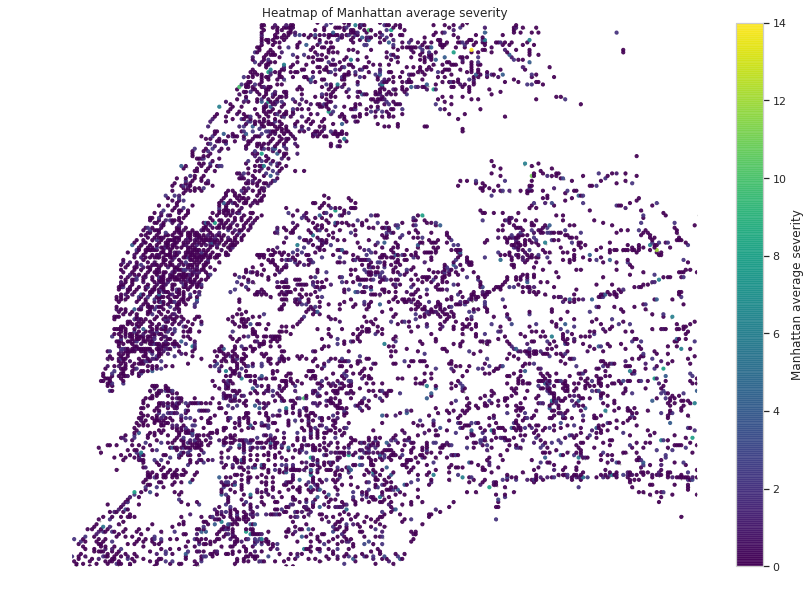

In [38]:
N = 10000
sample = collisions.sample(N)

# Round / bin the latitude and longitudes
sample['lat_bin'] = np.round(sample['LATITUDE'], 3)
sample['lng_bin'] = np.round(sample['LONGITUDE'], 3)

# Average severity for regions
gby_cols = ['lat_bin', 'lng_bin']

coord_stats = (sample.groupby(gby_cols)
               .agg({'SEVERITY': 'mean'})
               .reset_index())

# Visualize the average severity per region
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

scatter_trips = ax.scatter(sample['LONGITUDE'].values,
                           sample['LATITUDE'].values,
                           color='grey', s=1, alpha=0.5)

scatter_cmap = ax.scatter(coord_stats['lng_bin'].values,
                          coord_stats['lat_bin'].values,
                          c=coord_stats['SEVERITY'].values,
                          cmap='viridis', s=10, alpha=0.9)

cbar = fig.colorbar(scatter_cmap)
cbar.set_label("Manhattan average severity")
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Heatmap of Manhattan average severity')
plt.axis('off');

### Question 1c
Do you think the location of the accident has a significant impact on the severity based on the visualization above? Additionally, identify something that could be improved in the plot above and describe how we could improve it.

In [39]:
q1c_answer = r"""

The plot above shows the map of Manhattan color-coded according to the average accident severity. It looks like most
of Manhattan has very low levels of average severity with a few spots with higher severity. From this, I believe that
location of the accident does have an impact on the severity, but it is difficult to tell with the visualization chosen.

This plot could really be improved by having more distinct range in colors of the severity levels. Also, it can be improved by 
having the ability to zoom in and out of the map, that way we can see exactly where (specific neighborhoods and avenues)
there are higher levels of accident severity. Seeing a colored avenue based on severity level would be very helpful in
confirming whether location of the accident does have a significant impact on the severity of the accident. 

"""

#raise NotImplementedError()

print(q1c_answer)



The plot above shows the map of Manhattan color-coded according to the average accident severity. It looks like most
of Manhattan has very low levels of average severity with a few spots with higher severity. From this, I believe that
location of the accident does have an impact on the severity, but it is difficult to tell with the visualization chosen.

This plot could really be improved by having more distinct range in colors of the severity levels. Also, it can be improved by 
having the ability to zoom in and out of the map, that way we can see exactly where (specific neighborhoods and avenues)
there are higher levels of accident severity. Seeing a colored avenue based on severity level would be very helpful in
confirming whether location of the accident does have a significant impact on the severity of the accident. 




### Question 1d
Create a plot to visualize one or more features of the `collisions` table. 

In [40]:
collisions.head()

,DATETIME,Unnamed: 0,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME,DATE,SEVERITY,FATALITY,INJURY
UNIQUE KEY,,,,,,,,,,,,,,,,,,,,,
3589202,2016-12-29 00:00:00,207836,NaN,NaN,40.844107,-73.897997,"(40.8441075, -73.8979971)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,0,2016-12-29,0,0,0
3587413,2016-12-26 14:30:00,208475,NaN,NaN,40.692347,-73.881778,"(40.6923473, -73.8817778)",NaN,NaN,NaN,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,14,2016-12-26,0,0,0
3578151,2016-11-30 22:50:00,214339,NaN,NaN,40.755480,-73.741730,"(40.75548, -73.74173)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,22,2016-11-30,2,0,2
3567096,2016-11-23 20:11:00,218291,NaN,NaN,40.771122,-73.869635,"(40.7711224, -73.8696353)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,20,2016-11-23,0,0,0
3565211,2016-11-21 14:11:00,219698,NaN,NaN,40.828918,-73.838403,"(40.8289179, -73.8384031)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,14,2016-11-21,0,0,0


Text(0.5,1,'Fatality by Borough')

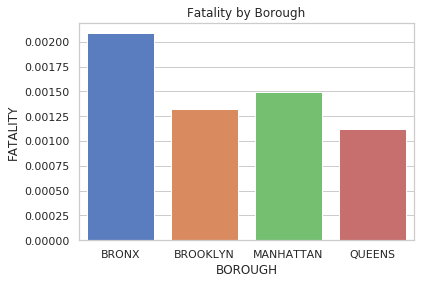

In [41]:
#Fatality
sns.barplot(x='BOROUGH', y='FATALITY', ci = None, data=collisions)
plt.title("Fatality by Borough")

### Question 1e
Answer the following questions regarding your plot in 1d.
1. What feature you're visualization
2. Why you chose this feature
3. Why you chose this visualization method

In [42]:
q1e_answer = r"""

1. I am visualizing the collision dataframe features, 'Fatality' and 'Borough'.  
2. I chose to inspect fatality with respect to the boroughs of NYC as that is what I was interested in understanding when
looking at the heat map above. I want to see where in NYC there are the highest average deaths due to taxi rides. So, 
to answer that question, I simply looked at each borough and their respective fatalty rates. 
3. I chose a bar plot as the visualization method because it is clear, simple, and easy to understand. It also visually organizes
the boroughs NYC (x-axis) with their respective fatality levels (y-axis) in a great way. We are able to see from the 
bar plot that the Bronx is the borough with the highest average fatality rate. 

"""

#raise NotImplementedError()
print(q1e_answer)



1. I am visualizing the collision dataframe features, 'Fatality' and 'Borough'.  
2. I chose to inspect fatality with respect to the boroughs of NYC as that is what I was interested in understanding when
looking at the heat map above. I want to see where in NYC there are the highest average deaths due to taxi rides. So, 
to answer that question, I simply looked at each borough and their respective fatalty rates. 
3. I chose a bar plot as the visualization method because it is clear, simple, and easy to understand. It also visually organizes
the boroughs NYC (x-axis) with their respective fatality levels (y-axis) in a great way. We are able to see from the 
bar plot that the Bronx is the borough with the highest average fatality rate. 




## 2: Combining External Datasets
It seems like accident timing and location may influence the duration of a taxi ride. Let's start to join our NYC Taxi data with our collisions data. 

Let's assume that an accident will influence traffic in the surrounding area for around 1 hour. Below, we create two columns, `START` and `END`:
- `START`: contains the recorded time of the accident
- `END`: 1 hours after `START`

**Note:** We chose 1 hour somewhat arbitrarily, feel free to experiment with other time intervals outside this notebook.

In [43]:
collisions['START'] = collisions['DATETIME']
collisions['END'] = collisions['START'] + pd.Timedelta(hours=1)

### Question 2a
Drop all of the columns besides the following: `DATETIME`, `TIME`, `START`, `END`, `DATE`, `LATITUDE`, `LONGITUDE`, `SEVERITY`. Feel free to experiment with other subsets outside of this notebook.

In [44]:
collisions_subset = collisions[['DATETIME', 'TIME', 'START', 'END', 'DATE', 'LATITUDE', 'LONGITUDE', 'SEVERITY']].copy()

#raise NotImplementedError()
collisions_subset.head(5)

,DATETIME,TIME,START,END,DATE,LATITUDE,LONGITUDE,SEVERITY
UNIQUE KEY,,,,,,,,
3589202,2016-12-29 00:00:00,0,2016-12-29 00:00:00,2016-12-29 01:00:00,2016-12-29,40.844107,-73.897997,0
3587413,2016-12-26 14:30:00,14,2016-12-26 14:30:00,2016-12-26 15:30:00,2016-12-26,40.692347,-73.881778,0
3578151,2016-11-30 22:50:00,22,2016-11-30 22:50:00,2016-11-30 23:50:00,2016-11-30,40.755480,-73.741730,2
3567096,2016-11-23 20:11:00,20,2016-11-23 20:11:00,2016-11-23 21:11:00,2016-11-23,40.771122,-73.869635,0
3565211,2016-11-21 14:11:00,14,2016-11-21 14:11:00,2016-11-21 15:11:00,2016-11-21,40.828918,-73.838403,0


In [45]:
assert collisions_subset.shape == (116691, 8)

### Question 2b
Now, let's merge our `collisions_subset` table with `train_df`. Start by merging with only the date. We will filter by a time window in a later question.

We should be performing a left join, where our `train_df` is the left table. This is because we want to preserve all of the taxi rides in our end result. It happens that an inner join will also work, since both tables contain data on each date.

Note that the resulting `merged` table will have multiple rows for every taxi ride row in the original `train_df` table. For example, `merged` will have 483 rows with `index` equal to 16709, because there were 483 accidents that occurred on the same date as ride #16709.

Because of memory limitation, we will select the third week of 2016 to analyze. Feel free to change to it week 1 or 2 to see if the observation is general. 

In [46]:
data_file = Path("./", "cleaned_data.hdf")
train_df = pd.read_hdf(data_file, "train")
train_df = train_df.reset_index() 
train_df = train_df[['index', 'tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'duration']]
train_df['date'] = train_df['tpep_pickup_datetime'].dt.date

In [47]:
collisions_subset = collisions_subset[collisions_subset['DATETIME'].dt.weekofyear == 3]
train_df = train_df[train_df['tpep_pickup_datetime'].dt.weekofyear == 3]

In [48]:
train_df.head()

,index,tpep_pickup_datetime,pickup_longitude,pickup_latitude,duration,date
8,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21
10,16244,2016-01-21 13:23:14,-73.970497,40.764194,575.0,2016-01-21
11,16188,2016-01-21 12:08:56,-73.968475,40.764996,1470.0,2016-01-21
15,16753,2016-01-21 23:35:12,-73.988518,40.745411,675.0,2016-01-21
16,16482,2016-01-21 18:33:06,-74.014458,40.709648,1927.0,2016-01-21


In [49]:
collisions_subset.head()

,DATETIME,TIME,START,END,DATE,LATITUDE,LONGITUDE,SEVERITY
UNIQUE KEY,,,,,,,,
3376021,2016-01-23 01:04:00,1,2016-01-23 01:04:00,2016-01-23 02:04:00,2016-01-23,40.673550,-73.801311,0
3376756,2016-01-23 08:20:00,8,2016-01-23 08:20:00,2016-01-23 09:20:00,2016-01-23,40.651975,-73.865409,2
3375618,2016-01-22 07:35:00,7,2016-01-22 07:35:00,2016-01-22 08:35:00,2016-01-22,40.754263,-73.743329,0
3375217,2016-01-22 08:48:00,8,2016-01-22 08:48:00,2016-01-22 09:48:00,2016-01-22,40.810053,-73.925144,0
3375473,2016-01-21 10:35:00,10,2016-01-21 10:35:00,2016-01-21 11:35:00,2016-01-21,40.701651,-73.991484,0


In [50]:
# merge the dataframe here
merged = pd.merge(train_df, collisions_subset, left_on = 'date', right_on = 'DATE', how = 'left')

#raise NotImplementedError()

merged.head()

,index,tpep_pickup_datetime,pickup_longitude,pickup_latitude,duration,date,DATETIME,TIME,START,END,DATE,LATITUDE,LONGITUDE,SEVERITY
0,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 10:35:00,10,2016-01-21 10:35:00,2016-01-21 11:35:00,2016-01-21,40.701651,-73.991484,0
1,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 13:20:00,13,2016-01-21 13:20:00,2016-01-21 14:20:00,2016-01-21,40.704760,-74.014961,0
2,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 16:00:00,16,2016-01-21 16:00:00,2016-01-21 17:00:00,2016-01-21,40.732891,-73.920574,4
3,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 18:30:00,18,2016-01-21 18:30:00,2016-01-21 19:30:00,2016-01-21,40.714122,-73.831508,0
4,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 00:05:00,0,2016-01-21 00:05:00,2016-01-21 01:05:00,2016-01-21,40.700108,-73.953819,0


In [51]:
assert merged.shape == (1528162, 14)

### Question 2c
Now that our tables are merged, let's use temporal and spatial proximity to condition on the duration of the average length of a taxi ride. Let's operate under the following assumptions.

Accidents only influence the duration of a taxi ride if the following are satisfied:

1) The haversine distance between the the pickup location of the taxi ride and location of the recorded accident is within 5 (km). This is roughly 3.1 miles.

2) The start time of a taxi ride is within a 1 hour interval between the start and end of an accident.

Complete the code below to create an `'accident_close'` column in the `merged` table that indicates if an accident was close or not according to the assumptions above.

In [52]:
def haversine(lat1, lng1, lat2, lng2):
    """
    Compute haversine distance
    """
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    average_earth_radius = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    """
    Compute Manhattan distance
    """
    a = haversine(lat1, lng1, lat1, lng2)
    b = haversine(lat1, lng1, lat2, lng1)
    return a + b

In [54]:
start_to_accident = haversine(merged['pickup_latitude'].values,
                              merged['pickup_longitude'].values,
                              merged['LATITUDE'].values,
                              merged['LONGITUDE'].values)
merged['start_to_accident'] = start_to_accident

# initialze accident_close column to all 0 first
merged['accident_close'] = 0

# Boolean pd.Series to select the indices for which accident_close should equal 1:
# (1) record's start_to_accident <= 5 
# (2) pick up time is between start and end
is_accident_close = (merged['start_to_accident']<= 5) & (merged['tpep_pickup_datetime']>= merged['START']) & (merged['tpep_pickup_datetime']<= merged['END'])


#raise NotImplementedError()

merged.loc[is_accident_close, 'accident_close'] = 1


In [55]:
assert merged['accident_close'].sum() > 16000

The last step is to aggregate the total number of proximal accidents. We want to count the total number of accidents that were close spatially and temporally and condition on that data. 

The code below create a new data frame called `train_accidents`, which is a copy of `train_df`, but with a new column that counts the number of accidents that were close (spatially and temporally) to the pickup location/time. 

In [56]:
train_df = train_df.set_index('index')
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents = train_df.copy()
train_accidents['num_accidents'] = num_accidents

Next, for each value of `num_accidents`, we plot the average `duration` of rides with that number of accidents.

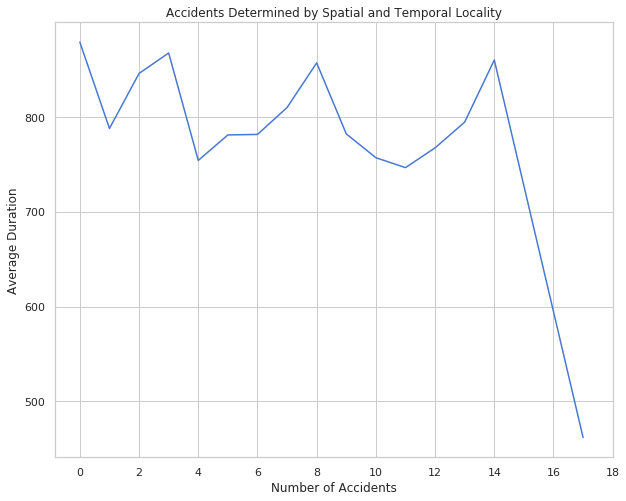

In [57]:
plt.figure(figsize=(10,8))
train_accidents.groupby('num_accidents')['duration'].mean().plot(xticks=np.arange(0, 20, 2))
plt.title("Accidents Determined by Spatial and Temporal Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

It seems that using both spatial and temporal proximity doesn't give us much insight on if collisions increase taxi ride durations. Let's try conditioning on spatial proximity and temporal proximity separately and see if there are more interesting results there.

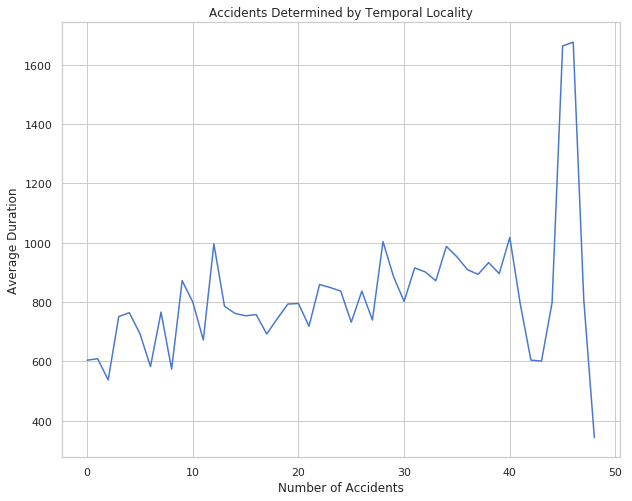

In [58]:
# Temporal locality

# Condition on time
index = (((merged['tpep_pickup_datetime'] >= merged['START']) & \
         (merged['tpep_pickup_datetime'] <= merged['END'])))

# Count accidents
merged['accident_close'] = 0
merged.loc[index, 'accident_close'] = 1
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents_temporal = train_df.copy()
train_accidents_temporal['num_accidents'] = num_accidents

# Plot
plt.figure(figsize=(10,8))
train_accidents_temporal.groupby('num_accidents')['duration'].mean().plot()
plt.title("Accidents Determined by Temporal Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

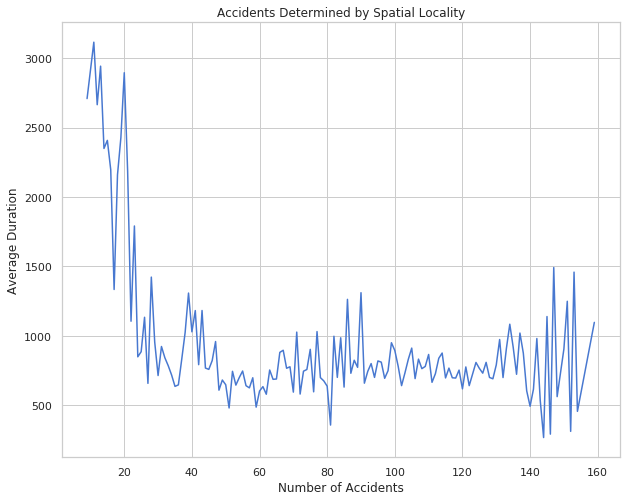

In [59]:
# Spatial locality

# Condition on space
index = (merged['start_to_accident'] <= 5)

# Count accidents
merged['accident_close'] = 0
merged.loc[index, 'accident_close'] = 1
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents_spatial = train_df.copy()
train_accidents_spatial['num_accidents'] = num_accidents

# Plot
plt.figure(figsize=(10,8))
train_accidents_spatial.groupby('num_accidents')['duration'].mean().plot()
plt.title("Accidents Determined by Spatial Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

### Question 2d
By conditioning on temporal and spatial proximity separately, we reveal different trends in average ride duration as a function of number of accidents nearby.

What can you say about the temporal and spatial proximity of accidents to taxi rides and the effect on ride duration? Think of a new hypothesis regarding accidents and taxi ride durations and explain how you would test it.

Additionally, comment on some of the assumptions being made when we condition on temporal and spatial proximity separately. What are the implications of only considering one and not the other? 

In [1]:
q2d_answer = r"""

The plot above conditions on temporal and spatial proximity separately, revealing different trends in average ride 
duration as a function of the number of accidents nearby.

What we can conclude about the temporal proximity of accidents of taxi rides and their effect on ride duration is:
We see from the plot above that as the number of accidents increase, so does the average duration of the taxi rides. 
Ther are a few dips, but overall it follows a pretty consistent and increasing trend / pattern until it hits past 40 
accidents. After 40 accidents there is a decrease in duration, and then a sharp increase in duration around 45 
accidents. That sharp increase is the highest peak of duration at over 1600 seconds. After this, there is a 
decrease in duration as we get closer to 50 accidents. We can conclude from this that longer taxi rides may 
correlate to a higher number of accidents. But besides this, there is no inconclusive evidence that these two
features correlate. 

What we can conclude about the spatial proximity of accidents of taxi rides and their effect on ride duration is:
We see from the plot above that there are also dips and increases in the number of accidents with respect to average 
duration. There is an initial decrease in duration for small number of accidents. As the number of accidents increase, 
duration decreases, and around 30 accidents and more, there is a steady trend of duration ranging around 500 to 1500 
seconds of duration. So there is no clear correlation between the number of accidents that occur locally and the average 
duration of a taxi ride. 

If we focus only on spatial locality, the accidents may have happened at anytime in January, but it would only affect 
the ride if they happened simultaneously. As for temporal locality, ignoring spatial locality would make us consider 
accidents far away although they may not affect the ride duration. 

In addition, when we condition on temporal and spatial proximity separately, we make the assumption that they don't 
have any effect or influence on each other. We also condition on temporal data happening at specific hours of the 
day, and spatial proximity limitted to 5 miles, or nearby to each other. 

Considering only one implies that they have no relationship with each other, which may not be necessarily true.
Also, there may be a congestion of accidents that occcur within the same hour but none of them occur near each other, 
which is why it is important to consider both together (alongside with other features). If not, then we would'nt be able 
to make any signicicant conclusion on ride duration since one of the locations may not experience congestion.  

My hypothesis regarding accidents and taxi ride durations is that the number of collisions does not have an effect on 
the duration of a ride. This can be tested through using bootstrapping to select samples, compute the mean of each sample,
and then define a p-value using this mean and a previously calculated test statistic. If our p-value is smaller than 
alpha = 0.05 then we can reject the null and conclude that the number of collisions does have an effect on the 
duration of taxi rides. 
"""

#raise NotImplementedError()

print(q2d_answer)



The plot above conditions on temporal and spatial proximity separately, revealing different trends in average ride 
duration as a function of the number of accidents nearby.

What we can conclude about the temporal proximity of accidents of taxi rides and their effect on ride duration is:
We see from the plot above that as the number of accidents increase, so does the average duration of the taxi rides. 
Ther are a few dips, but overall it follows a pretty consistent and increasing trend / pattern until it hits past 40 
accidents. After 40 accidents there is a decrease in duration, and then a sharp increase in duration around 45 
accidents. That sharp increase is the highest peak of duration at over 1600 seconds. After this, there is a 
decrease in duration as we get closer to 50 accidents. We can conclude from this that longer taxi rides may 
correlate to a higher number of accidents. But besides this, there is no inconclusive evidence that these two
features correlate. 

What we ca

## Part 3 Exports
We are not requiring you to export anything from this notebook, but you may find it useful to do so. There is a space below for you to export anything you wish.

In [4]:
Path("data/part3").mkdir(parents=True, exist_ok=True)
data_file = Path("data/part3", "data_part3.hdf") # Path of hdf file
...

Ellipsis

## Part 3 Conclusions

We merged the NYC Accidents dataset with our NYC Taxi dataset, conditioning on temporal and spatial locality. We explored potential features by visualizing the relationship between number of accidents and the average duration of a ride. 

**Please proceed to part 4 where we will be engineering more features and building our models using a processing pipeline.**

## Submission

You're almost done!

Before submitting this assignment, ensure that you have:

1. Restarted the Kernel (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Validated the notebook by clicking the "Validate" button.

Then,

1. **Submit** the assignment via the Assignments tab in **Datahub** 
1. **Upload and tag** the manually reviewed portions of the assignment on **Gradescope**